<a href="https://colab.research.google.com/github/gouravgujariya/machine-learning-project/blob/main/mantainace_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dftrain=pd.read_csv('/content/drive/MyDrive/Python Scripts/kaggle/maintence_pridiction/predictive_maintenance.csv')

In [3]:
dftrain.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure


In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
dftrain.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
dftrain.shape

(10000, 10)

In [7]:
dftrain.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
dftrain['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [9]:
dftrain['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [16]:
df=dftrain.drop(['Product ID','UDI'],axis=1)

In [18]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [22]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()
df.Type=le.fit_transform(df['Type'])
df['Failure Type']= le.fit_transform(df['Failure Type'])

In [31]:
df.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1


In [32]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,1.039000
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.379069
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,1.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,1.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,5.000000


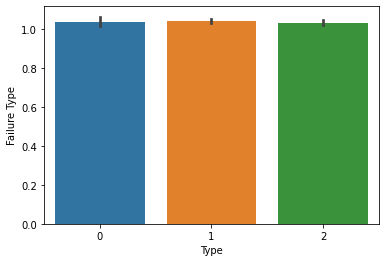

In [35]:
# plt.scatter(df.Type,df['Failure Type'])
import seaborn as sns
sns.barplot(x=df.Type,y=df['Failure Type'])

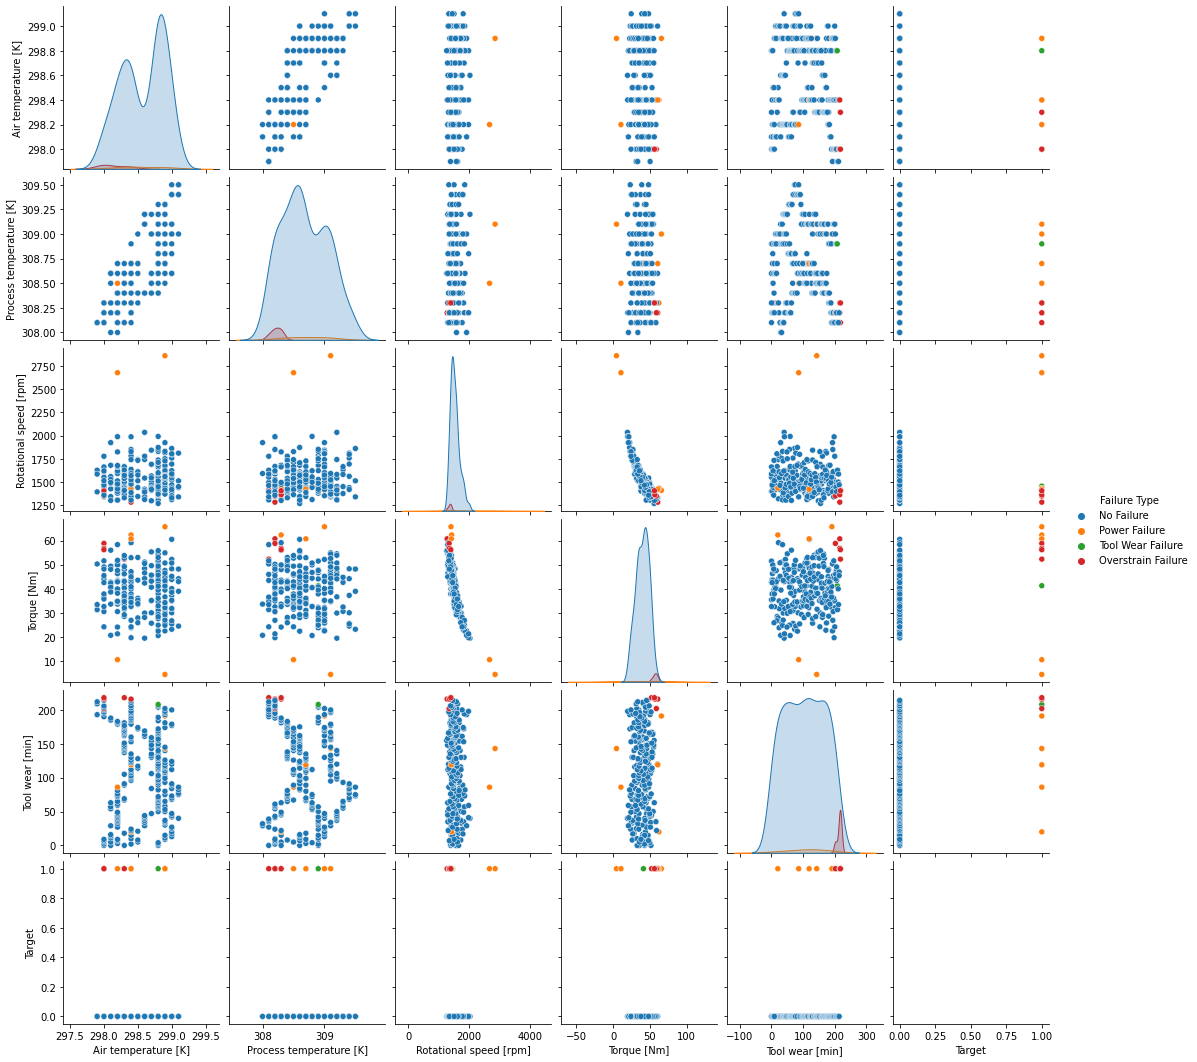

In [38]:
sns.pairplot(dftrain.iloc[:255,1:10],hue='Failure Type')

In [39]:
x=df.drop('Failure Type',axis=1)
y=df['Failure Type']

In [43]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
x_s=s.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x_s,y,test_size=0.2,random_state=True)

In [49]:
from sklearn.cluster import KMeans

In [51]:
km=KMeans(n_clusters=4)  
km.fit(xtr,ytr)

KMeans(n_clusters=4)

In [52]:
ypre=km.predict(xte)

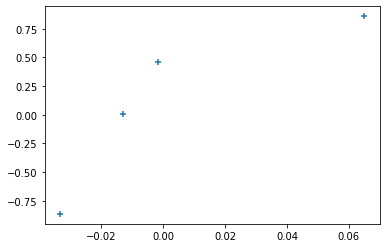

In [55]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',label='centroid')

In [69]:
k_rng=range(1,10)
for k in k_rng:
  print(k)

1
2
3
4
5
6
7
8
9


In [73]:
k_rng=[1,2,3,4,5,6,7,8,9,10]
ss=[]
for k in k_rng:
  km1=KMeans(n_clusters=k)
  km1.fit(xtr,ytr)
  ss.append(km1.inertia_)

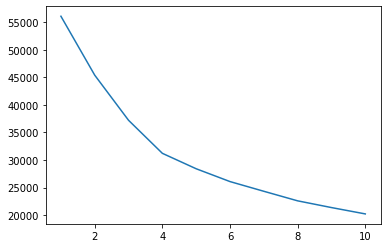

In [74]:
plt.plot(k_rng,ss)

In [75]:
from sklearn.cluster import DBSCAN

In [76]:
db=DBSCAN()
db.fit(xtr,ytr)

DBSCAN()

In [100]:
Y=db.fit_predict(xte)

In [80]:
clusters=db.labels_

In [81]:
clusters

array([ 0, -1,  1, ..., -1, -1,  0])

In [102]:
clusters.unique

AttributeError: ignored

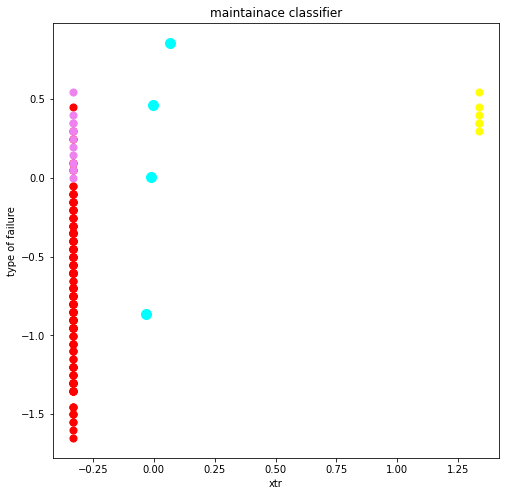

In [104]:

plt.figure(figsize=(8,8))
plt.scatter(xte[Y==0,0], xte[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(xte[Y==1,0], xte[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(xte[Y==2,0], xte[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(xte[Y==3,0], xte[Y==3,1], s=50, c='violet', label='Cluster 4')

# plot the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('maintainace classifier')
plt.xlabel('xtr')
plt.ylabel('type of failure')
plt.show()

In [94]:
plt.subplot(xtr[:200,1:7],clusters[:200,:])

IndexError: ignored

In [89]:
clusters.shape

(8000,)